<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance d'Activité Humaine](https://github.com/wikistat/Ateliers-Big-Data/5-HumanActivityRecognition) ([*HAR*](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>
##  Première étape:  étude des variables "métier"

## 1 Introduction
### 1.1 Contexte
Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*) à partir d’enregistrements, par exemple du gyroscope et de l'accéléromètre d'un smartphone, objet connecté précurseur et dont la fonctionnalité de téléphonie devient très secondaire.
Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  

Les données publiques disponibles et largement étudiées ont été acquises, décrites et analysées par [Anguita et al. (2013)]().
Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine ainsi que sur le site *Kaggle*.

L'archive contient les données brutes: accélérations en x, y, et z, chacun de 128 colonnes. D'autres fichiers en y soustrayant la gravité naturelle ainsi que les accélérations angulaires en x, y, et z soit en tout 9 fichiers. Mais 6 utiles avec 6*128=768 mesures.

Elle contient également deux fichiers "train" et "test" de *features* ou variables métier calculées dans les domaines temporels et fréquentiels: 561 variables.

Les données sont labellisées avec 6 activités: debout, assis, couché, marche, monter ou descendre un escalier. Il s'agit donc, en première lecture, d'un problème de classification supervisée (6 classes) avec 10299 observations (apprentissage  et trest) décrites par 561 variables.

Voici une liste indicative des variables calculées sur chacune des variables initiales et couples de variables:

Name|Signification
-|-
mean | Mean value
std | Standard deviation
mad | Median absolute value
max | Largest values in array
min | Smallest value in array
sma | Signal magnitude area
energy | Average sum of the squares
iqr | Interquartile range
entropy | Signal Entropy
arCoeff | Autorregresion coefficients
correlation | Correlation coefficient
maxFreqInd | Largest frequency component
meanFreq | Frequency signal weighted average
skewness | Frequency signal Skewness
kurtosis | Frequency signal Kurtosis
energyBand | Energy of a frequency interval
angle | Angle between two vectors

### 1.2 Objectifs
Cette première étape s'intéresse aux seules variables construites à partir des connaissances *a priori* du comportement des capteurs en fonction des types d'activité humaine. Ce premier calepin propose une exploration et une modélisation, sans effort d'optimisation (paramètres par défaut), des 561 variables métier. Quelle méthode ou algorihtme d'apprentissage permet de déterminer au mieux l'activité humaine? 

Une deuxième étape à venir s'intéresse aux données brutes. Est-il possible d'économiser le travail préliminaire de définition des variables métier en utilisant par exemple les ressources de décompositions systématiques sur une base d'ondelette ou un algorihtme d'apprentissage profond?

### 1.3 Travail à réaliser
- Exploration avec notamment une analyse en composantes principales
- Modélisation, prévision de l'échantillon test par
   - régression logistique
   - $k$ plus proches voisins
   - SVM
   - Random Forest
   - Gradient boosting
   - XGBoost
   - Réseau de neurones
- Ajouter à ce calepin: optimisation des paramètres des différentes méthodes

## 2 Lecture des données d'apprentissage

In [47]:
# Graphiques dans la fenêtre
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

In [48]:
# Lecture des données d'apprentissage
# Attention, il peut y avoir plusieurs espaces comme séparateur
path="./../data_har/"
Xtrain=pd.read_table(path+"train/X_train.txt",sep='\s+',header=None)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [49]:
ytrain=pd.read_table(path+"train/y_train.txt",sep='\s+',header=None,names=('y'))
ytrain.head()

,y
0,5
1,5
2,5
3,5
4,5


In [50]:
# Lecture des données de test
# Attention, il peut y avoir plusieurs espaces comme séparateur
Xtest=pd.read_table(path+"test/X_test.txt",sep='\s+',header=None)

In [51]:
ytest=pd.read_table(path+"test/y_test.txt",sep='\s+',header=None,names=('y'))

## 3 Exploration

### 3.1 Analyse en composantes principales

Il est important de se faire une idée précise de la structure des données. Une analyse en composantes principales est adaptée à cet objectif.

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

La fonction ci-après construit la représentation graphique d'un plan factoriel.

In [53]:
label_dic = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}
LABELS = ["WALKING","WALKING UPSTAIRS","WALKING DOWNSTAIRS","SITTING","STANDING","LAYING"]

def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(6):
        xs = X_r[ytrain["y"]==i+1,nbc-1]
        ys = X_r[ytrain["y"]==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

In [54]:
pca = PCA()
X_r = pca.fit_transform(Xtrain)

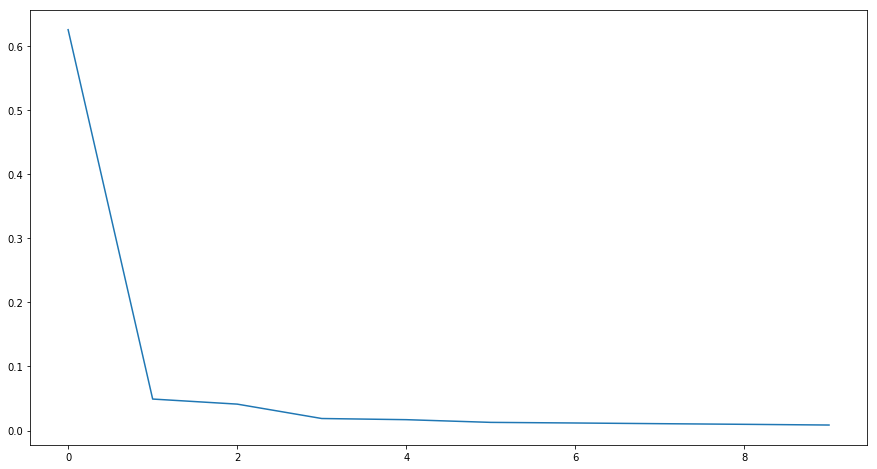

In [55]:
## Décroissance des premières valeurs propres
plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

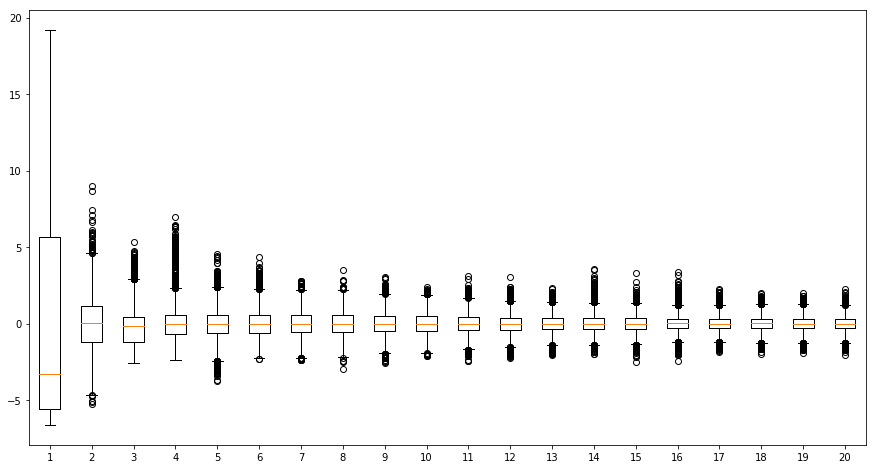

In [56]:
## distribution des premières composantes principales
plt.figure(figsize=(15,8))
plt.boxplot(X_r[:,0:20])
plt.show()

**Q** Combien choisir de composantes?

L'éboulis des valeurs propres montre que la première composante contient plus de 60% de l'information. Les autres se distinguent moins les unes des autres.  
On s'intéresse par la suite aux quatre premiers axes, les autres ne semblant pas contenir plus d'information.

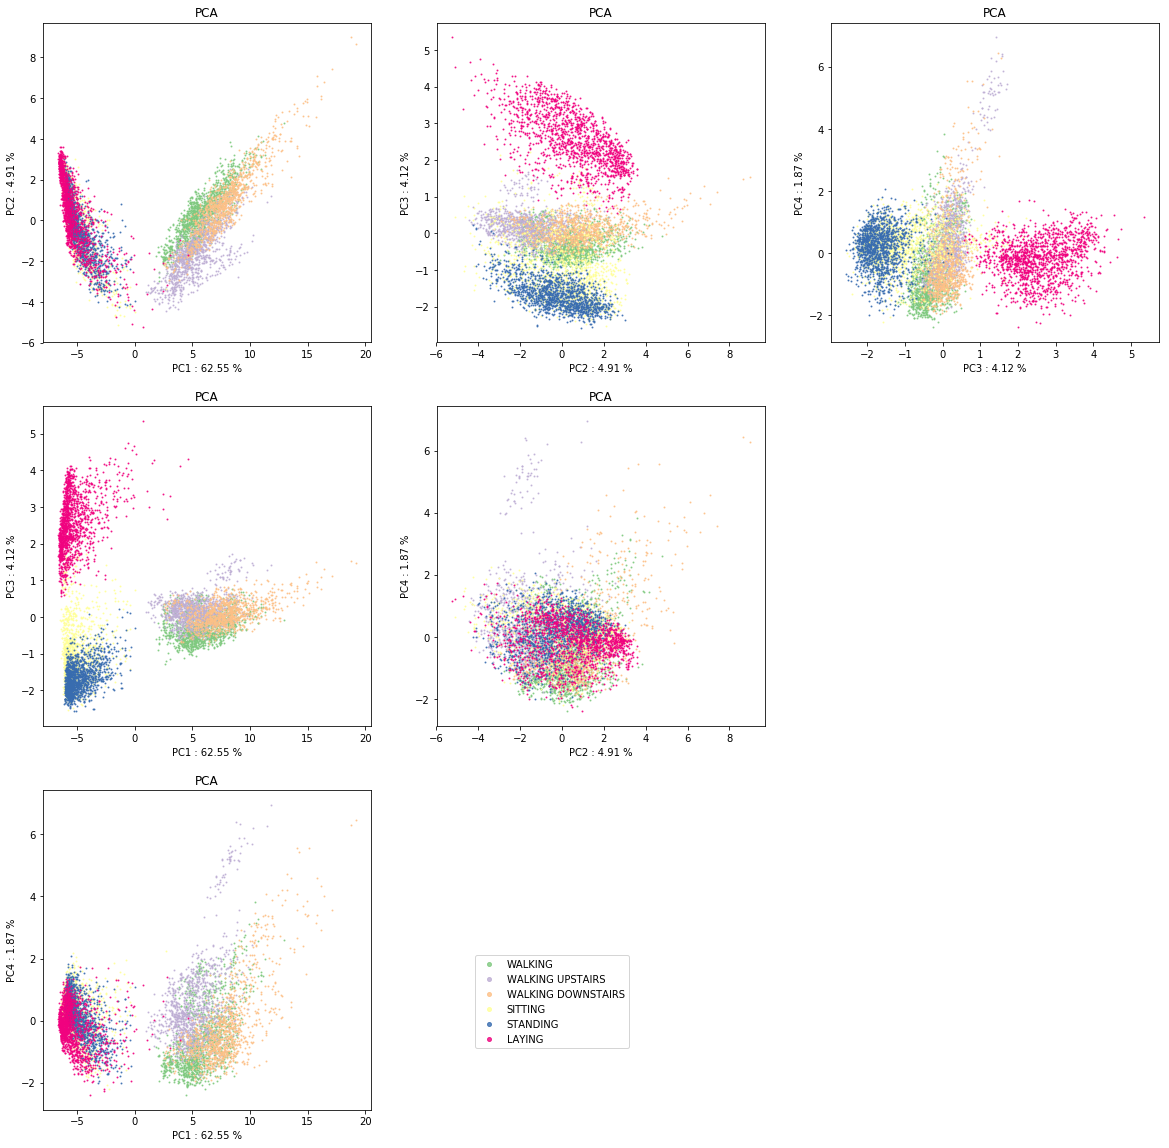

In [57]:
cmaps = plt.get_cmap("Accent")

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r, fig,ax,nbc,nbc2)
    plt.title("PCA")
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=4)
plt.show()

**Q** Commenter la séparation des deux types de situation par le premier axe.  
La première composante résume la majorité de l'information (62%). Elle discrimine deux classes : les activités passives et les activités de marche. Par rapport au 1er axe, le 3ème arrive en plus à discriminer les activités standing et laying. Le second axe n'est pas intéressant pour essayer de discriminer les activités.      

**Q** Que dire sur la forme des nuages?  
Les nuages sont assez denses et faciles à délimiter pour les 1ère et 3e composantes. 

**Q** Que dire sur la plus ou moins bonne séparation des classes?  
En général, il est beaucoup plus facile de distinguer chacune des classes passives, alors que les classes actives sont plus confuses entres elles.  On le voit bien par exemple sur l'ACP entre la 1ère et la 3e composante.  



Les graphiques des variables sont illisibles compte tenu de leur trop grand nombre. Ce n'est pas indispensable mais intéressant de chercher quelques variables les plus influentes des axes factoriels.

**Variables de l'ACP**

Lecture des libellés des variables et constitution d'une liste.

In [58]:
with open(path+'features.txt', 'r') as content_file:
    featuresNames = content_file.read()
columnsNames = list(map(lambda x : x.split(" ")[1],featuresNames.split("\n")[:-1]))


Représentation des variables... c'est évidemment illisible en mettant les libellés en clair. Seul un point "." est représenté.


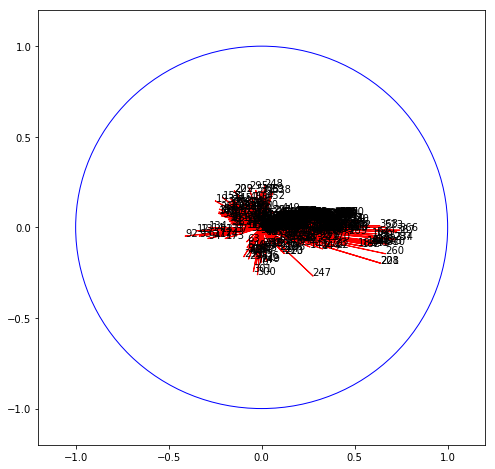

In [59]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, Xtrain.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

In [60]:
np.array(columnsNames)[abs(coord1)>1]

array([], 
      dtype='<U36')


### 3.2 Analyse Factorielle Discriminante (AFD)

L'ACP ne prend pas en compte la présence de la variable qualitative à modéliser contrairement à l'analyse factorielle discriminante qui calcule l'ACP des barycentres des classes. De plus l'espace des indivudus est muni d'une métrique spécifique: Mahalanobis. L'objectif est alors de visualiser les capacités des variables à discriminer les classes.

La librairie scikit-learn ne propose pas de fonction spécifique d'analyse factorielle discriminante mais les coordonnées des individus dans la base des vecteurs discriminants sont obtenues comme résultats de l'analyse discriminante linéaire décisionnnelle. Cette dernière sera utilisé avec une finalité prédictive dans un deuxième temps.


/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


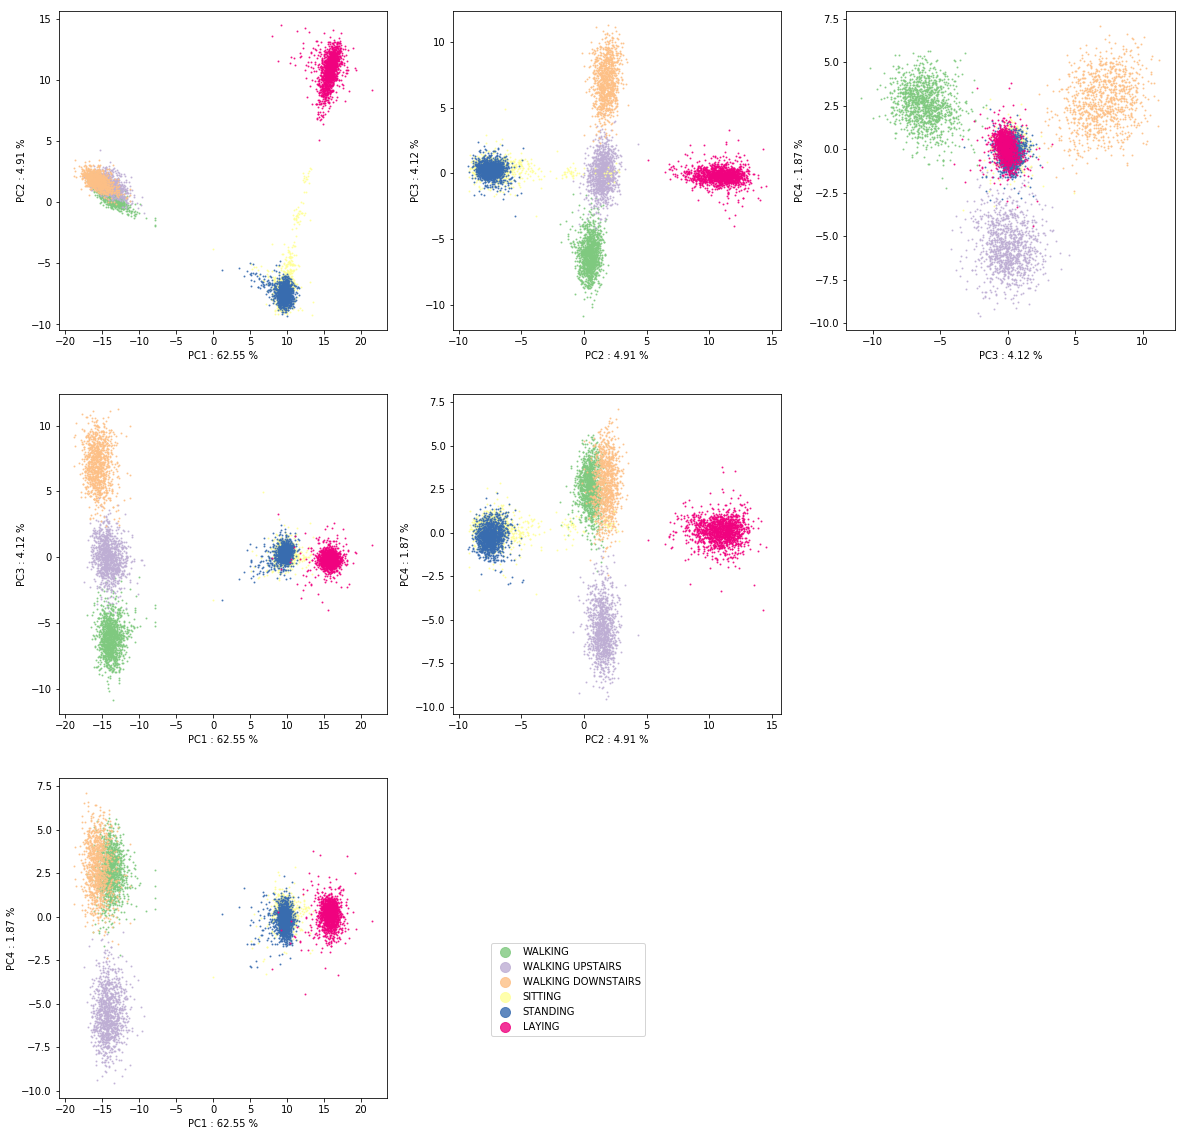

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis() 
lda=method.fit(Xtrain,ytrain)
X_r=lda.transform(Xtrain)

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

**Q** Que dire de la séparation des classes ? Sont-elles toutes séparables deux à deux ?  

Les classes `standing` et `sitting` sont toujours très proches et difficiles à discriminer entre elles. La 2e composante permet de bien discriminer `laying` et les activités actives. Il faut la 3e composante pour arriver à séparer les 3 activités actives. Remarquons que la 4e composante est utile pour discriminer `walking upstairs` par rapport aux 2 autres classes actives.  

**Q** Que dire de la forme des nuages notamment dans le premier plan ?  

Les nuages de classes sont très denses dans le premier plan, bien que certains individus se détachent un peu des nuages `standing` et `laying`.

Il serait opportun de réfléchir à la représentation des variables dans les axes discriminants.

### 3.3 Classification non supervisée

Cette section n'est pas utile puisque les classes sont connues mais elle permet d'illusrer le comportement de deux alorithmes de classification non supervisée. Comparer dans une matrice de confusion les classes obtenues avec celles connues permet d'en comparer les performances.  

**$k$-means**

Attention, il est nécessaire de centrer et réduire les variables avant d'exécuter un algorithle de classification non supervisé.

In [67]:
lda.coef_

array([[  40.99688608,   -0.70622748,   12.65079604, ...,  -47.50882917,
        -188.81457305,   33.87226921],
       [  41.10658208,  -25.4406988 ,  -10.52493333, ...,  -15.19093609,
         -89.79887028,   25.23103812],
       [  48.00513518,  -23.23023736,    3.90495028, ...,  -46.06270389,
        -173.15179445,   69.37249349],
       [ -29.8171655 ,    7.78213628,    6.45254416, ...,  104.45840587,
          77.03662585,   25.43858897],
       [ -29.54072173,   14.52176277,   10.53246738, ...,   56.15112437,
          59.28542023,  -21.85025239],
       [ -44.61178515,   15.0021247 ,  -21.91647863, ...,  -65.04735594,
         226.04211476,  -99.28455093]])

In [88]:
# coordonnées des variables
#coord1=lda.coef_[0]*np.sqrt(lda.explained_variance_ratio_[0]/100)
#coord2=lda.coef_[1]*np.sqrt(lda.explained_variance_ratio_[1]/100)
#fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1)
#for i, j, nom in zip(coord1,coord2, Xtrain.columns):
#    #plt.text(i, j, nom,fontsize=0)
#    plt.arrow(0,0,i,j,color='k')
#plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
#c=plt.Circle((0,0), radius=1, color='b', fill=False)
#ax.add_patch(c)
#plt.show()

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
tps1 = time.clock()
X = StandardScaler().fit_transform(Xtrain)
km=KMeans(n_clusters=6, n_jobs=1)
km.fit(Xtrain)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1))

Temps execution Kmeans : 4.792637000000013


In [34]:
pd.DataFrame(confusion_matrix(ytrain, km.labels_)[1:7,0:6], columns=LABELS)

,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
0,0,555,0,587,84,0
1,0,215,0,814,44,0
2,0,627,0,134,225,0
3,304,0,932,1,0,49
4,412,0,962,0,0,0
5,164,0,0,10,0,1233


On remarque que l'algorithme $k$-means n'arrive pas à discriminer en 6 classes. Cependant, il discrimine bien deux ensembles ; par contre ils ne correspondent pas tout à fait aux activités passives et aux activités actives.
L'activité `Laying` rejoint les activités actives tandis que `Walking upstairs` rejoint les activités passives.

***DBSCAN***

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
tps1 = time.clock()
db = DBSCAN(eps=4, min_samples=5).fit(X)
tps2 = time.clock()
print("Temps execution Kmeans :", (tps2 - tps1))

Temps execution Kmeans : 26.084592999999998


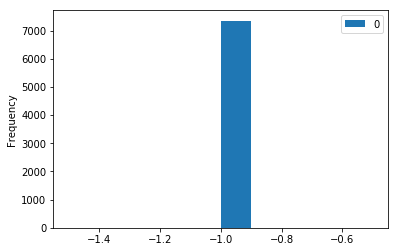

In [39]:
import pandas as pd
pd.DataFrame(db.labels_).plot(kind="hist")
plt.show()

On remarque que l'algorithme DBSCAN n'arrive pas à discriminer les différentes activités : il ne trouve qu'une seule classe. 

## 4 Apprentissage et prévision du test  

Un échantillon test est fourni avec les données. Cet échantillon est utilisé pour estimer une erreur de prévision comparable avec la littérature. Néanmoins, il serait opportun d'exécuter une validation croisée Monte Carlo. Certes l'échantillon test est de taille raisonnable (2947) mais comme les prévisions sont très bonnes, les comparaisons ne reposent que sur le plus ou moins bon classement de quelques situations parmi les 2947.

Différentes méthodes sont successivement testées.

In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
ytrain=ytrain["y"]
ytest=ytest["y"]

### 4.1 Régression logistique  
#### Sans pénalisation

Une méthode ancienne mais finalement bien adaptée aux données. Une première approche est réalisée sans sélection de variables.

**Q** Alors que la régression logistique est adaptée à la prévision d'une variable binaire, quelle est la stratégie utilisée par défaut pour l'appliquer à une variable qualitative à 6 classes ?  

Pour appliquer une régression logistique à une variable qualitative à 6 classes, une solution proposée est de renouveler 6 fois une regression logistique simple en prenant comme variable binaire de réponse l'une des classes vs les 5 autres classes (régression logistique polytomique).

In [41]:
ts = time.time()
method = LogisticRegression()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total=te-ts

In [42]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.961995, time running : 3 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,494,0,2,0,0,0
WALKING UPSTAIRS,23,448,0,0,0,0
WALKING DOWNSTAIRS,4,9,407,0,0,0
SITTING,0,4,0,432,55,0
STANDING,2,0,0,13,517,0
LAYING,0,0,0,0,0,537


#### Avec pénalisation Lasso 

In [43]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
ts = time.time()
param=[{"C":[0.5,1,5,10,12,15,30]}]
method_LR = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
method_LR=method_LR.fit(Xtrain, ytrain)  # GridSearchCV est lui même un estimateur
te = time.time()
t_total=te-ts

In [44]:
print("Temps : %d secondes" %(t_total))

Temps : 3 secondes


In [45]:
# paramètre optimal
method_LR.best_params_["C"]
score = method_LR.score(Xtest, ytest)
print("Score : %f" %score)
print("Meilleur paramètre = %s" % method_LR.best_params_)

Score : 0.965049
Meilleur paramètre = {'C': 5}


In [46]:
ypred = method_LR.predict(Xtest)
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,492,2,2,0,0,0
WALKING UPSTAIRS,17,454,0,0,0,0
WALKING DOWNSTAIRS,4,3,413,0,0,0
SITTING,0,4,0,430,56,1
STANDING,2,0,0,12,518,0
LAYING,0,0,0,0,0,537


**Q** L'amélioration est-elle bien significative ?  
Non, il y a très peu de changements. Le résultat s'améliore légèrement pour certaines classes, et se détériore pour d'autres.

### 4.2 Analyse discriminante linéaire

**Q** Que dire de l'optimisation de cette méthode ? Celle-ci est proposée dans une librairie de R mais pas disponible en python.  

Cette méthode peut être optimisée par la méthode du noyau.  

**Q** L'analyse discriminante quadratique bloque et ne fournit pas de résultats. Pourquoi?

L'analyse discriminante quadratique est basée sur la distance de Mahalanobis qui est l'inverse de la matrice de covariance intraclasse. Or il est possible que cette matrice de soit pas inversible.

**Q** Quel paramètre de cet algortihme pourrait être optimisé?

In [19]:
ts = time.time()
method_LDA = LinearDiscriminantAnalysis()
method_LDA=method_LDA.fit(Xtrain,ytrain)
score = method_LDA.score(Xtest, ytest)
ypred = method_LDA.predict(Xtest)
te = time.time()
t_total = te-ts

/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.962335, time running : 0 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,490,6,0,0,0,0
WALKING UPSTAIRS,11,460,0,0,0,0
WALKING DOWNSTAIRS,1,14,405,0,0,0
SITTING,0,1,0,434,56,0
STANDING,0,0,0,22,510,0
LAYING,0,0,0,0,0,537


### 4.3 *K* plus proches voisins

Cette méthode peut être vue comme un cas particulier d'analyse discriminante avec une estimation locale des fonctions de densité conditionnelle.

In [21]:
ts = time.time()
param_grid=[{"n_neighbors":list(range(1,15))}]
method_KN=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
method_KN=method_KN.fit(Xtrain,ytrain)
score = method_KN.score(Xtest, ytest)
ypred = method_KN.predict(Xtest)
te = time.time()
t_total = te-ts

In [22]:
method_KN.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_KN.best_score_,method_KN.best_params_))

Meilleur score = 0.900843, Meilleur paramètre = {'n_neighbors': 14}


In [23]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.903631, time running : 741 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,486,0,10,0,0,0
WALKING UPSTAIRS,41,424,6,0,0,0
WALKING DOWNSTAIRS,51,46,323,0,0,0
SITTING,0,4,0,404,83,0
STANDING,0,0,0,40,492,0
LAYING,0,0,0,2,1,534


**Q** Les résultats obtenus méritent-ils de lancer une optimisation de $k$?

### 4.4 Random forest

**Q** Quel serait le paramètre à optimiser?

In [24]:
ts = time.time()
param=[{"max_features":list(range(2,10,1))}]
method_RF= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
method_RF=method_RF.fit(Xtrain,ytrain)
score = method_RF.score(Xtest, ytest)
ypred = method_RF.predict(Xtest)
te = time.time()
t_total = te-ts

In [25]:
method_RF.best_params_["max_features"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_RF.best_score_,method_RF.best_params_))

Meilleur score = 0.929543, Meilleur paramètre = {'max_features': 7}


In [26]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.935528, time running : 24 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,485,3,8,0,0,0
WALKING UPSTAIRS,28,436,7,0,0,0
WALKING DOWNSTAIRS,25,50,345,0,0,0
SITTING,0,0,0,434,55,2
STANDING,0,0,0,12,520,0
LAYING,0,0,0,0,0,537


### Gradient boosting

In [27]:
ts = time.time()
method_GB = GradientBoostingClassifier()
method_GB=method_GB.fit(Xtrain,ytrain)
score = method_GB.score(Xtest, ytest)
ypred = method_GB.predict(Xtest)
te = time.time()
t_total = te-ts

In [28]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.937224, time running : 126 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,486,5,5,0,0,0
WALKING UPSTAIRS,24,439,7,1,0,0
WALKING DOWNSTAIRS,7,26,387,0,0,0
SITTING,0,2,0,415,74,0
STANDING,0,0,0,34,498,0
LAYING,0,0,0,0,0,537


### SVM linéaire

In [29]:
ts = time.time()
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
method_LSVM = GridSearchCV(LinearSVC(),param,cv=10,n_jobs=-1)
method_LSVM=method_LSVM.fit(Xtrain,ytrain)
score = method_LSVM.score(Xtest, ytest)
ypred = method_LSVM.predict(Xtest)
te = time.time()
t_total = te-ts

In [30]:
method_LSVM.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_LSVM.best_score_,method_LSVM.best_params_))

Meilleur score = 0.952258, Meilleur paramètre = {'C': 1.4}


In [31]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.967764, time running : 112 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,496,0,0,0,0,0
WALKING UPSTAIRS,17,453,1,0,0,0
WALKING DOWNSTAIRS,2,4,414,0,0,0
SITTING,0,3,0,433,53,2
STANDING,1,0,0,12,519,0
LAYING,0,0,0,0,0,537


### SVM avec noyau gaussien

In [32]:
ts = time.time()
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
method_SVM = GridSearchCV(SVC(),param,cv=10,n_jobs=-1)
method_SVM=method_SVM.fit(Xtrain,ytrain)
score = method_SVM.score(Xtest, ytest)
ypred = method_SVM.predict(Xtest)
te = time.time()
t_total = te-ts

In [33]:
method_SVM.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_SVM.best_score_,method_SVM.best_params_))

Meilleur score = 0.926279, Meilleur paramètre = {'C': 1.4}


In [34]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.946386, time running : 653 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,493,0,3,0,0,0
WALKING UPSTAIRS,17,452,2,0,0,0
WALKING DOWNSTAIRS,10,27,383,0,0,0
SITTING,0,2,0,432,57,0
STANDING,0,0,0,40,492,0
LAYING,0,0,0,0,0,537


### XGBoost

In [35]:
from xgboost import XGBClassifier

/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
ts = time.time()
param=[{"n_estimators":[50,100,200]}]     #parametre par défaut = 100
method_XGB = GridSearchCV(XGBClassifier(),param,cv=10,n_jobs=-1)
method_XGB=method_XGB.fit(Xtrain,ytrain)
score = method_XGB.score(Xtest, ytest)
ypred = method_XGB.predict(Xtest)
te = time.time()
t_total = te-ts

In [37]:
method_XGB.best_params_["n_estimators"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_XGB.best_score_,method_XGB.best_params_))

Meilleur score = 0.942601, Meilleur paramètre = {'n_estimators': 200}


In [38]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.943332, time running : 890 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,491,3,2,0,0,0
WALKING UPSTAIRS,30,435,5,1,0,0
WALKING DOWNSTAIRS,7,21,392,0,0,0
SITTING,0,2,0,420,69,0
STANDING,0,0,0,27,505,0
LAYING,0,0,0,0,0,537


***RANDOM CROSS VALIDATION FOR XGBOOST*** (à tester avec GPU inch'Allah)

import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbclass = XGBClassifier(nthreads=-1)  

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbclass, params, n_jobs=1)  

### Réseau de neurones avec sklearn

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(Xtrain)  
Xtrain_net = scaler.transform(Xtrain)  
# Meme transformation sur le test
Xtest_net = scaler.transform(Xtest)

In [40]:
ts = time.time()
param_grid=[{"hidden_layer_sizes":list([(5,),(10,),(15,),(20,)])}]
method_NN= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
methode_NN=method_NN.fit(Xtrain_net, ytrain)
score = method_NN.score(Xtest_net, ytest)
ypred = method_NN.predict(Xtest_net)
te = time.time()
t_total = te-ts
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (method_NN.best_score_,method_NN.best_params_))

Meilleur score = 0.938792, Meilleur paramètre = {'hidden_layer_sizes': (15,)}


In [41]:
print("Score : %f, time running : %d secondes" %(score, t_total))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.935867, time running : 63 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,488,0,8,0,0,0
WALKING UPSTAIRS,19,445,7,0,0,0
WALKING DOWNSTAIRS,13,28,379,0,0,0
SITTING,0,3,0,421,67,0
STANDING,0,0,0,24,508,0
LAYING,0,0,0,0,20,517


### Réseau de neurones avec Keras

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,SimpleRNN, Lambda,GRU,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D,LSTM,LocallyConnected2D,Convolution2D,Reshape,Conv1D
from keras.utils import np_utils
from keras.optimizers import RMSprop,Nadam,Adam,SGD
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

print(keras.__version__)

Using TensorFlow backend.


2.0.2


In [43]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=561, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(100, input_dim=561, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
    return model

In [44]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset

nb_epoch=15
batch_size=5

ts = time.time()
nnet_keras = KerasClassifier(build_fn=baseline_model, batch_size=batch_size, verbose=1)

nnet_keras.fit(Xtrain_net,ytrain,epochs=nb_epoch)
score = nnet_keras.score(Xtest_net, ytest)
ypred = nnet_keras.predict(Xtest_net)
te = time.time()

Epoch 1/15
7352/7352 [==============================] - 2s - loss: 0.2163 - acc: 0.7986     
Epoch 2/15
7352/7352 [==============================] - 1s - loss: 0.0778 - acc: 0.9185     
Epoch 3/15
7352/7352 [==============================] - 1s - loss: 0.0636 - acc: 0.9370     
Epoch 4/15
7352/7352 [==============================] - 1s - loss: 0.0583 - acc: 0.9484     
Epoch 5/15
7352/7352 [==============================] - 1s - loss: 0.0486 - acc: 0.9572     
Epoch 6/15
7352/7352 [==============================] - 1s - loss: 0.0443 - acc: 0.9645     
Epoch 7/15
7352/7352 [==============================] - 1s - loss: 0.0409 - acc: 0.9680     
Epoch 8/15
7352/7352 [==============================] - 1s - loss: 0.0373 - acc: 0.9735     
Epoch 9/15
7352/7352 [==============================] - 1s - loss: 0.0348 - acc: 0.9750     - ETA: 1
Epoch 10/15
7352/7352 [==============================] - 1s - loss: 0.0317 - acc: 0.9784     
Epoch 11/15
7352/7352 [==============================] - 1s -

In [45]:
print("Score sur l'échantillon test : %f, time running : %d secondes" %(score, te-ts))

Score sur l'échantillon test : 0.946386, time running : 22 secondes


La couche Dropout fait baisser considérablement le score sur l'échantillon test donc n'est pas judicieuse dans ce cas là.  

On teste la validation croisée pour obtenir une moyenne empirique de l'erreur sur l'échantillon test. Comme la validation croisée prend beaucoup de temps, nous avons pris un réseau de neurones simplifié. 

In [46]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=561, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
    return model

In [47]:
nnet_keras = KerasClassifier(build_fn=baseline_model, batch_size=batch_size, verbose=1)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(nnet_keras, Xtrain_net, ytrain, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/10
6616/6616 [==============================] - 1s - loss: 0.2336 - acc: 0.7938     
Epoch 2/10
6616/6616 [==============================] - 1s - loss: 0.0963 - acc: 0.8940     
Epoch 3/10
6616/6616 [==============================] - 1s - loss: 0.0747 - acc: 0.9276     
Epoch 4/10
6616/6616 [==============================] - 1s - loss: 0.0645 - acc: 0.9439     
Epoch 5/10
6616/6616 [==============================] - 1s - loss: 0.0599 - acc: 0.9491     
Epoch 6/10
6616/6616 [==============================] - 1s - loss: 0.0549 - acc: 0.9592     
Epoch 7/10
6616/6616 [==============================] - 1s - loss: 0.0511 - acc: 0.9618     
Epoch 8/10
6616/6616 [==============================] - 0s - loss: 0.0481 - acc: 0.9678     
Epoch 9/10
6616/6616 [==============================] - 1s - loss: 0.0464 - acc: 0.9707     
Epoch 10/10
6616/6616 [==============================] - 1s - loss: 0.2514 - acc: 0.7730     
Epoch 2/10
6616/6616 [==============================] - 1s - loss: 0.

# Comparaison des méthodes : courbe ROC

In [48]:
from sklearn.metrics import roc_curve
listMethod=[["LR",method_LR],["LDA",method_LDA],["KN",method_KN],["RF",method_RF],["GB",method_GB],["LSVM",method_LSVM]
            ,["SVM",method_SVM],["XGB",method_XGB]]

In [49]:
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(Xtest)
    fpr, tpr, thresholds = roc_curve(ytest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

ValueError: multiclass format is not supported

***Idée : superlearner en faisant une combinaison de tous les modèles linéaires.  ***
## Analyse des performances 

### A suivre : deuxième étape sur les données brutes
- Apprentissage sur les décompositons en ondelettes
- Apprentissage profond 